In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import Libraries

In [ ]:
!pip install contractions
!pip install pycaret

In [54]:
import nltk
import pandas as pd
import numpy as np
import contractions
import re
import math
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.featstruct import remove_variables
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WhitespaceTokenizer
from sklearn.model_selection import train_test_split
from textblob import TextBlob
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from pycaret.classification import *
from sklearn.metrics import confusion_matrix
from sklearn import svm

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Text Processor Class

In [35]:
class TextProcessor:
  """
  This is a class to preprocess natural language data(text).
  
  ...
  
  Attributes
  ----------
  raw_txt                              :   raw text feeded into object
  tokens(type==list)                   :   tokenized corpus
  filtered(type==list)                 :   list with removed stop words
  reduced(type==list)                  :   stemmed or lemmatized corpus
  corpus_dict(type==dict)              :   dictionary storing unique words in corpus
  onehotencoder(type=list(list))       :   one hot encoded bag of words
  raw_list_processed(type==list(list)) :   list of cleaned, tokenized and lemmatized class object for each document in corpus
  tfidf_out(type==list(list))          :   TF-IDF output
  
  
  Methods
  -------
  regular_exp():
      returns <simplyfid numbers and emails>
  
  tokeni(tokenizeon:str \\default = 'Whitespace'
            ):
      returns <tokenized data>
      tokenizeon() : [sent_tokenize, word_tokenize, TreebankWordTokenizer,wordpunct_tokenize, WhitespaceTokenizer, TweetTokenizer]

  remove_stopwords(language:str \\default ='english'
            ):
      returns <corpus after removing stopwords>
  
  
  sorl(method:str \\default = 'lemm'
            ):
      returns <stemmed or lemmatized corpus>
  
  get_preprocessed_text():
      returns <list of word tokens>

  auto_complete(method:str     \\default=='lemm'
                language:str   \\default=='english'
                tokenizeon:str \\default=='WhiteSpaceTokenizer'):
      returns <cleaned, tokenized and lemmatized corpus>
      
  bow(lang:str \\default = 'english'
            ):
      returns <one hot encoded bag of words>
  
  tfidf(lang:str \\default = 'english'
            ):
      returns <Term Frequency - Inverse Frequency 2D list>
  """
  def __init__(self):
    return None
  #   self.raw_txt      = raw_txt  #### Raw Input
  #   self.text         = ""
  #   self.tokens       = []       #### Tokenization Ouput
  #   self.filtered     = []       #### removed stopwords Ouput
  #   self.reduced      = []       #### Stemming or lemmatization output
  #   self.corpus_dict  = {}       #### Corpus Dictionary
  #   self.onehotencoder= []       #### Bag of words ouput
  #   self.raw_list_processed = [] #### list input processed ouput
  #   self.tfidf_out    = []       #### tfidf output 
  #   self.tf_idf_df    = pd.DataFrame() #### tfidf DataFrame
  #   self.bow_df       = pd.DataFrame() #### bag of words DataFrame
  #   self.pos_out      = []
  #   self.pos_tg       = []
  #   self.entities     = []
  #   self.n_grams      = []
  
  def clean(self,text) -> str:
    """
    Expanding contractions and cleaning of text is performed
      
      Parameters
      ----------
      None
    
      Returns
      -------
      string
      
    """
    FContrac = [contractions.fix(l) for l in text.split()]     #expanding contractions
    text = re.sub(r'[^A-Za-z0-9\s\.,\@]', ' ', ' '.join(FContrac))  #removes special characters
    text = re.sub(r'\s{2,}', ' ', text)                            #removes extra spaces
    text = text.lower()
    return text
  
  def regular_exp(self,text) -> str:
    """
    simplifes numbers and emails
      
      Parameters
      ----------
      None
    
      Returns
      -------
      string
    """
    text = re.sub(r'\b(\d+(\.\d+)?)\b',' number ',text)                            #Simplifies numbers
    text = re.sub(r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)','webssssite', text)
    text = re.sub(r'\w[!-?A-~]*@\w[\w\.]*\w',  'email_id', text)   #Simplifies emails
    text = re.sub(r'[\.,]',' ',text)                                     #Removing "." & ","
    return text

  def regular_exp2(self) -> str:
    """
    simplifes numbers and emails
      
      Parameters
      ----------
      None
    
      Returns
      -------
      string
    """
    self.text = re.sub(r'\d+','<number>',self.text)                            #Simplifies numbers
    self.text = re.sub(r'\w[!-?A-~]*@\w[\w\.]*\w',  '<email_id>', self.text)   #Simplifies emails
    return self.text
  
  
  def tokeni(self,text:str,tokenizeon: str) -> list:
    """
    Tokenization is performed
    
      Parameters
      ----------
      tokenizeon : str
        any(sent_tokenize, word_tokenize, TreebankWordTokenizer,wordpunct_tokenize, WhitespaceTokenizer, TweetTokenizer)
      
      Returns
      -------
      list
    """    
    if tokenizeon == 'sent_tokenize':
      tokens = nltk.tokenize.sent_tokenize(text)                  
    elif tokenizeon == 'word_tokenize':
      tokens = nltk.tokenize.word_tokenize(text)                  
    elif tokenizeon == 'TreebankWordTokenizer':
      tk = TreebankWordTokenizer()
      tokens = tk.tokenize(text)
    elif tokenizeon == 'wordpunct_tokenize':
      tokens = nltk.tokenize.wordpunct_tokenize(text)
    elif tokenizeon == 'TweetTokenizer':
      tk = TweetTokenizer()
      tokens = tk.tokenize(text)
    elif tokenizeon == 'WhitespaceTokenizer':
      tk = WhitespaceTokenizer()
      tokens = tk.tokenize(text)  
    else:
      print("please check tokenizer provided")
    return tokens
  
  
  def remove_stopwords(self,tokens:list, language: str) -> list:
    """
    Function to remove stopwords using NLTK libraries
    
      Parameters
      ----------
      language : str   #default = WhitespaceTokenizer
      
      Returns
      -------
      list
    """
    stop_words = nltk.corpus.stopwords.words("english")                             #setting stop word langugage
    filtered = [w for w in tokens if not w.lower() in stop_words] #list comprehension to create a list without stop words.
    return filtered
  

  def sorl(self,filtered:list, method: str) -> list:
    """
    Stemming and lemmatization of data
    
      Parameters
      ----------
      method : str   #default = 'lemm'
      
      Returns
      -------
      list
      
    """
    if method == 'stem':
      ps = PorterStemmer()
      reduced = [ps.stem(w) for w in filtered]              #Stemming
    elif method == 'lemm':
      lem = WordNetLemmatizer()
      reduced = [lem.lemmatize(w) for w in filtered]        #Lemmatization
    else:
      print("please check method provided")
    return reduced
  

  def get_preprocessed_text(self) -> list:
    """
    Returns preprocessed data as list
    
      Parameters
      ----------
      None
      
      Returns
      -------
      list
    """
    return self.reduced
  
  def bow(self,raw_txt , lang:str = 'english') -> list:
    """
    Returns one hot encoded bag of words
    
      Parameters
      ----------
      lang : str   #default = 'english'
      
      Returns
      -------
      list(list)
    """
    # creating a list of cleaned, tokenized and lemmatized class object for each document in corpus 
    if not isinstance(self.raw_txt, list):
        self.raw_list_processed = [' '.join(TextProcessor(self.raw_txt).auto_complete(language = lang))]
    else:
        self.raw_list_processed = [' '.join(TextProcessor(i).auto_complete(language = lang)) for i in self.raw_txt]
    print("pre-processed_input: \n{}\n\n".format(self.raw_list_processed))

    #Finding unique word and storing as dictionary with defined values
    words = ""
    for i in self.raw_list_processed:
      words += ' ' + i
    unique_words = set(words[1:].split(' '))
    self.corpus_dict = dict(zip(unique_words, range(len(unique_words))))           #Corpus dictionary
    
    #Iterating through each document in processed corpus and one hot encoding them
    for i in self.raw_list_processed:
      self.onehotencoder.append(self.process_zero_array(i,len(unique_words)))
    self.bow_df = pd.DataFrame(self.onehotencoder, columns = list(self.corpus_dict.keys()))
    return self.onehotencoder
  
  def process_zero_array(self,document:str,unique_words_len:int)->list:
    """
    Returns one hot encoded list
    
      Parameters
      ----------
      document         : list
      unique_words_len : int
      
      Returns
      -------
      list
    """
    zero_array = np.zeros(unique_words_len)                 #Creating a zero array of number of unique words in corpus
    for i in document.split():                             #for each document sent from previous function as arguement 
      zero_array[self.corpus_dict[i]] = zero_array[self.corpus_dict[i]]+1  #self.corpus_dict[i] --> will give us location of word in list to increment
    return list(zero_array)
  
  
  #TF = No. of repetition of word in sentence/No. of words in Sentence
  #IDF = math.log(No. of sentences/ No. of sentences containing words, 2)
  #TF-IDF = TF*IDF
  
  
  def tfidf(self,lang:str = 'english'):
    """
    Returns Term Frequency - Inverse Document Frequency product vector
    
      Parameters
      ----------
      lang : str   #default = 'english'
      
      Returns
      -------
      list(list)
    """
    tf = self.bow(lang)         # getting bow() method one hot encoder output to further give intensity/importance of word in corpus
    print("initial tf : \n{}\n".format(tf))
                                                            #TF = No. of repetition of word in sentence/No. of words in Sentence
    for i in range(len(tf)):                                           #iterating through each one hot encoded vector
      for j in range(len(tf[i])):                                      #iteration index for each value in vector
        tf[i][j] = tf[i][j]/len(self.raw_list_processed[i].split())    #TF output is evaluated
    num_of_sentences = len(tf)
    count_dict = {key:0 for key,values in self.corpus_dict.items()}   #creating a zero values dictionary to increment values based on keys present in documents
    
    #Iterating through corpus dictionary and original list with words to find key and increment value if present
    for key,values in self.corpus_dict.items():
      for word in self.raw_list_processed:
        if key in word.split():
          count_dict[key] += 1
    print("count_dict: \n{}\n\n".format(count_dict))
    key_counts_in_document = list(count_dict.values())                     #Converting dictionary into list
    idf = [math.log(num_of_sentences/i) for i in key_counts_in_document]   #IDF = Natural_Logarithm(No. of sentences/ No. of sentences containing word)    
    print("tf = \n{}\n".format(tf))
    print("count dictionary: \n{}\n".format(count_dict))
    print("count in list for corpus: {}\n".format(key_counts_in_document))
    print("idf = \n{}\n".format(idf))
    tfidf_out = []
    for sent in tf:
      row = [sent[i]*idf[i] for i in range(len(sent))]
      tfidf_out.append(row)
    
    self.tf_idf_df = pd.DataFrame(tfidf_out, columns = list(self.corpus_dict.keys()))
#     print(df)
#     df.to_csv("maybeout1.csv")
    return tfidf_out
  
  
  
  def auto_complete(self,method: str = 'lemm', language: str = 'english', tokenizeon:str = 'WhitespaceTokenizer') -> list:
    """
    Auto pre-processes data
    
      Parameters
      ----------
      method: str     #default = 'lemm'
      language:str    #default = 'english'
      tokenizeon:str  #default = 'WhitespaceTokenizer'
      
      Returns
      -------
      list
    """
    self.clean()
    self.regular_exp()
    self.tokeni(tokenizeon)
    self.remove_stopwords(language)
    self.sorl(method)
    return self.get_preprocessed_text()
  
  def spell_correct1(self):
    tb = TextBlob(self.text)
    self.text = str(tb.correct())

  def spell_correct(self):
    self.text = re.sub(r'([A-Za-z]+)(\d+)',r'\g<1>', self.text)

  def spell_correct2(self):
    chunks = nltk.ne_chunk(self.pos_tg)
    updated_tokens = []
    for i in range(len(chunks)):
      print('chunk : {}'.format(chunks[i]))
      if not hasattr(chunks[i],'label'):
        if not re.match(r'(^N\w+|^PRP)',chunks[i][1]):
          # print('before: {} \n after: {}'.format(chunks[i][0],TextBlob(chunks[i][0]).correct()))
          chunks[i] = (str(TextBlob(chunks[i][0]).correct()),chunks[i][1])
        else:
          chunks[i] = (chunks[i][0], chunks[i][1])
        updated_tokens.append(chunks[i][0])
      else:
        updated_tokens.append(chunks[i][0][0])
    
    print('updated tokens : {}'.format(updated_tokens))
  
  def pos(self)->list:
    """Method to tag Parts of speech to words.

    Returns:
        list: POS tagged words
    
    Tag Description
    1.	CC	Coordinating conjunction
    2.	CD	Cardinal number
    3.	DT	Determiner
    4.	EX	Existential there
    5.	FW	Foreign word
    6.	IN	Preposition or subordinating conjunction
    7.	JJ	Adjective
    8.	JJR	Adjective, comparative
    9.	JJS	Adjective, superlative
    10.	LS	List item marker
    11.	MD	Modal
    12.	NN	Noun, singular or mass
    13.	NNS	Noun, plural
    14.	NNP	Proper noun, singular
    15.	NNPS	Proper noun, plural
    16.	PDT	Predeterminer
    17.	POS	Possessive ending
    18.	PRP	Personal pronoun
    19.	PRP$	Possessive pronoun
    20.	RB	Adverb
    21.	RBR	Adverb, comparative
    22.	RBS	Adverb, superlative
    23.	RP	Particle
    24.	SYM	Symbol
    25.	TO	to
    26.	UH	Interjection
    27.	VB	Verb, base form
    28.	VBD	Verb, past tense
    29.	VBG	Verb, gerund or present participle
    30.	VBN	Verb, past participle
    31.	VBP	Verb, non-3rd person singular present
    32.	VBZ	Verb, 3rd person singular present
    33.	WDT	Wh-determiner
    34.	WP	Wh-pronoun
    35.	WP$	Possessive wh-pronoun
    36.	WRB	Wh-adverb
    """
    self.pos_tg = nltk.pos_tag(self.tokens)
    self.pos_out = [pair[0]+'_'+pair[1] for pair in self.pos_tg]
    return self.pos_out

  
  def NameEntityRecognition(self)->list:
    """Method to tag Entites

    Returns:
        list: Tagged Entities
    """
    for chunk in nltk.ne_chunk(self.pos_tg):
      if hasattr(chunk, 'label'):
        self.entities.append((chunk.label(), chunk[0][0]+'_'+chunk[0][1]))
      else:
        self.entities.append((None,chunk[0]+'_'+chunk[1]))
    return self.entities
  
  def ngrams(self,n:int = 2)->list:
    """Method to create a list of n-grams

    Args:
        n (int, optional): Number of N-grams. Defaults to 2.

    Returns:
        list: list of n-grams
    """
    n_grms = nltk.ngrams(self.tokens,n)
    self.n_grams = [grams for grams in n_grms]
    return self.n_grams
  


# Importing Data

In [36]:
data = pd.read_csv('/content/drive/MyDrive/SMSSpamCollection.txt',sep = r'\t',names=['label','document'])

In [37]:
train, test = train_test_split(data, test_size = 0.1, random_state = 1, stratify = data['label'])

# WordCloud for EDA

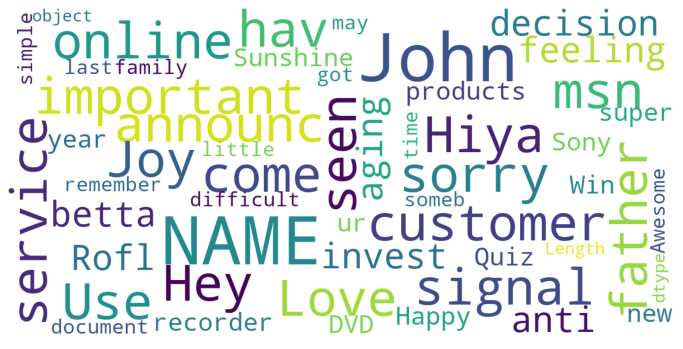

In [55]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        # stopwords=stopwords,
        max_words=7000,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(train['document'])

# Cleaning Training Data

In [38]:
cleaned_training_data = (
    train
    .assign(regex_clean = lambda x: [TextProcessor().clean(text) for text in x.document])
    .assign(simplified = lambda x: [TextProcessor().regular_exp(text) for text in x.regex_clean]) #numbers emails and websites
    .assign(tokenized = lambda x: [TextProcessor().tokeni(text,'WhitespaceTokenizer') for text in x.simplified]) 
    .assign(NoStopwords = lambda x: [TextProcessor().remove_stopwords(l,'english') for l in x.tokenized])
    .assign(cleaned = lambda x: [TextProcessor().sorl(nosw,'lemm') for nosw in x.NoStopwords])
    .assign(doctoSKLearn = lambda x: [' '.join(cleaned_text) for cleaned_text in x.cleaned])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sfunni\s',' funny ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\surgnt\s',' urgent ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\srealli\s',' really',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\shaf\s',' half ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\ssorri\s',' sorry ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\baight\b',' all right ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sprob\s',' problem ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\snoth\s',' nothing ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\swat\s',' what ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\svalentin\s',' valentine ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sshd\s',' should ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sreache\s',' reach ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\swan\s',' want ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sservice\s',' service ',text) for text in x.doctoSKLearn])
)

In [39]:
X_train = cleaned_training_data['doctoSKLearn']
len(X_train)

5016

In [40]:
y_train = cleaned_training_data['label']
len(y_train)

5016

# Creating TFIDF Matrix

In [41]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)

# Cleaning Testing Data

In [49]:
cleaned_testing_data = (
    test
    .assign(regex_clean = lambda x: [TextProcessor().clean(text) for text in x.document])
    .assign(simplified = lambda x: [TextProcessor().regular_exp(text) for text in x.regex_clean]) #numbers emails and websites
    .assign(tokenized = lambda x: [TextProcessor().tokeni(text,'WhitespaceTokenizer') for text in x.simplified]) 
    .assign(NoStopwords = lambda x: [TextProcessor().remove_stopwords(l,'english') for l in x.tokenized])
    .assign(cleaned = lambda x: [TextProcessor().sorl(nosw,'lemm') for nosw in x.NoStopwords])
    .assign(doctoSKLearn = lambda x: [' '.join(cleaned_text) for cleaned_text in x.cleaned])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sfunni\s',' funny ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\surgnt\s',' urgent ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\srealli\s',' really',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\shaf\s',' half ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\ssorri\s',' sorry ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\baight\b',' all right ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sprob\s',' problem ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\snoth\s',' nothing ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\swat\s',' what ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\svalentin\s',' valentine ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sshd\s',' should ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\sreache\s',' reach ',text) for text in x.doctoSKLearn])
    .assign(doctoSKLearn = lambda x: [re.sub(r'\swan\s',' want ',text) for text in x.doctoSKLearn])
)
X_test = cleaned_testing_data['doctoSKLearn']
print(len(X_test))
y_test = cleaned_testing_data['label']
print(len(y_test))
X_test = vectorizer.transform(X_test)

558
558


# Creating the Model
### SVM

In [51]:
from sklearn import svm
svm = svm.SVC(C=1000)
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
a = confusion_matrix(y_test, y_pred)
confu_matrix = pd.DataFrame(a,columns=['Predicted Ham','Predicted Spam'],index = ['True Ham','True Spam'])
confu_matrix

,Predicted Ham,Predicted Spam
True Ham,482,1
True Spam,6,69


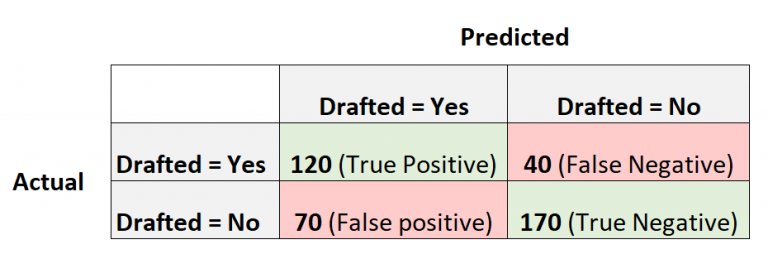

Precision = True Positive / (True Positive + False Positive)


Recall = True Positive / (True Positive + False Negative)


F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

In [52]:
def scoring(c:pd.DataFrame)->None:
  precision = c['Predicted Ham']['True Ham']/(c['Predicted Ham']['True Ham']+c['Predicted Ham']['True Spam'])
  print('Precision is {}'.format(precision))
  Recall = c['Predicted Ham']['True Ham']/(c['Predicted Ham']['True Ham']+c['Predicted Spam']['True Ham'])
  print('Recall is {}'.format(Recall))
  F1 = 2 * (precision * Recall)/ (precision + Recall)
  print('F1 Score is {}'.format(F1))
  return None

In [53]:
scoring(confu_matrix)

Precision is 0.9877049180327869
Recall is 0.9979296066252588
F1 Score is 0.9927909371781669


# Creating a DataFrame with features and Target for pycaret

In [22]:
df_pyc = pd.DataFrame(X_train.toarray(),columns=vectorizer.get_feature_names())
df_pyc['label'] = cleaned_training_data['label']
df_pyc.head()

,000pes,0776xxxxxxx,077xxx,0789xxxxxxx,07xxxxxxxxx,08452810075over18,08700435505150p,08700621170150p,08701417012150p,08704439680ts,0870737910216yrs,08712400602450p,0871277810710p,0871277810910p,087147123779am,08718727870150ppm,09066649731from,0quit,1000,1000call,100p,100percent,100txt,10am,10k,10p,10ppm,10th,118p,11mths,11pm,120p,125gift,12hours,12hrs,12mths,140ppm,146tf150p,14tcr,14thmarch,...,yo,yoga,yogasana,yor,yorge,youdoing,youi,young,younger,youphone,yourinclusive,yourjob,youuuuu,youwanna,yoville,yowifes,yoyyooo,yr,ything,yummmm,yummy,yun,yunny,yuo,yuou,yup,yupz,zac,zaher,zealand,zebra,zed,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ham


In [26]:
s = setup(data = df_pyc, target='label',
          numeric_features=vectorizer.get_feature_names(),
          session_id=123,verbose=False,silent=True)

In [27]:
m = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6384,0.4586,0.2143,0.0989,0.1353,-0.0554,-0.0620
1,0.6688,0.5294,0.3415,0.1522,0.2105,0.0385,0.0435
2,0.6372,0.5425,0.4146,0.1574,0.2282,0.0501,0.0601
3,0.6562,0.5326,0.3659,0.1531,0.2158,0.0409,0.0473
4,0.6278,0.5682,0.4878,0.1709,0.2532,0.0762,0.0948
5,0.6215,0.4607,0.2439,0.1010,0.1429,-0.0490,-0.0569
6,0.6120,0.4864,0.3171,0.1204,0.1745,-0.0160,-0.0192
7,0.6562,0.5326,0.3659,0.1531,0.2158,0.0409,0.0473
8,0.6467,0.5687,0.4634,0.1743,0.2533,0.0805,0.0970
9,0.6309,0.5048,0.3333,0.1359,0.1931,0.0060,0.0070


In [28]:
com  = compare_models(sort='F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
qda,Quadratic Discriminant Analysis,0.3831,0.4914,0.6372,0.1254,0.2084,-0.0088,-0.0119,20.727
lda,Linear Discriminant Analysis,0.6673,0.5211,0.3275,0.1472,0.2028,0.0293,0.0335,37.031
nb,Naive Bayes,0.6395,0.5184,0.3548,0.1417,0.2023,0.0213,0.0259,0.286
dt,Decision Tree Classifier,0.8013,0.5137,0.1068,0.1448,0.1224,0.0136,0.0139,7.904
svm,SVM - Linear Kernel,0.8474,0.0000,0.0365,0.1421,0.0579,0.0071,0.0083,1.004
et,Extra Trees Classifier,0.8389,0.5094,0.0291,0.0974,0.0446,-0.0156,-0.0190,12.181
ada,Ada Boost Classifier,0.8562,0.5034,0.0218,0.1325,0.0370,0.0036,0.0036,3.806
lightgbm,Light Gradient Boosting Machine,0.8553,0.5200,0.0170,0.1241,0.0297,-0.0037,-0.0044,0.680
rf,Random Forest Classifier,0.8568,0.5264,0.0121,0.0819,0.0211,-0.0079,-0.0148,7.983
knn,K Neighbors Classifier,0.8691,0.5091,0.0097,0.4000,0.0189,0.0123,0.0470,14.935
